---

# Продажа квартир в Санкт-Петербурге — анализ рынка недвижимости

---

<u>**Цель проекта**</u>: Используя данные сервиса "Яндекс.Недвижимость", определить рыночную стоимость объектов недвижимости и типичные параметры квартир.

<u>**Сферы деятельности компаний**</u>: интернет-сервисы, площадки объявлений.

<u>**Навыки и инструменты**</u>: Matplotlib, Pandas, Python, визуализация данных, исследовательский анализ данных, предобработка данных.

### 1. Получение общей информации

Импортируем Pandas и прочитаем csv-файл:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(..., nrows = 5)

In [3]:
df.head()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


Разберёмся с табуляцией, изучим общую информацию и случайные 15 строк таблицы:

In [4]:
data = pd.read_csv(..., sep='\t')

In [5]:
data.info()
data.sample(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
10044,0,4100000.0,54.00,2017-11-07T00:00:00,3,NaN,12.0,33.50,1,NaN,...,6.5,NaN,Санкт-Петербург,49711.0,15681.0,1.0,192.0,1.0,236.0,77.0
5900,7,5500000.0,46.20,2019-04-11T00:00:00,2,2.60,12.0,29.60,4,NaN,...,8.4,1.0,Санкт-Петербург,42363.0,10680.0,3.0,316.0,1.0,372.0,NaN
13174,3,2750000.0,36.16,2018-03-06T00:00:00,1,2.65,18.0,16.09,15,NaN,...,10.0,1.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,17.0
3222,6,2635000.0,36.60,2017-12-01T00:00:00,1,2.80,12.0,17.00,10,NaN,...,11.0,NaN,городской посёлок Новоселье,NaN,NaN,NaN,NaN,NaN,NaN,246.0
15956,0,3250000.0,42.00,2016-02-01T00:00:00,3,2.55,5.0,30.00,3,NaN,...,5.5,NaN,Санкт-Петербург,17218.0,17126.0,0.0,NaN,1.0,859.0,1077.0
3870,18,15700000.0,127.00,2019-02-21T00:00:00,3,3.20,3.0,84.20,3,NaN,...,39.0,NaN,Санкт-Петербург,21600.0,2457.0,1.0,218.0,1.0,755.0,28.0
14652,9,3000000.0,43.00,2018-07-11T00:00:00,2,NaN,4.0,28.00,3,NaN,...,5.0,NaN,Петергоф,39023.0,30932.0,3.0,154.0,0.0,NaN,90.0
11101,6,2960431.0,35.40,2015-03-06T00:00:00,1,2.70,25.0,16.10,25,False,...,10.7,NaN,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,1054.0
21839,20,2880000.0,31.60,2018-04-26T00:00:00,1,2.70,17.0,NaN,7,NaN,...,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,348.0
10726,12,5800000.0,58.90,2019-01-28T00:00:00,2,2.73,4.0,34.90,4,NaN,...,9.9,NaN,Пушкин,19303.0,34157.0,0.0,NaN,1.0,1099.0,NaN


## Вывод

### Максималистский подход:

Перед анализом данных необходимо переименовать столбцы. Предстоит заполнить пропуски в четырнадцати столбцах. Почти все данные требуют смены типа.

В частности, столбец 'last_price' содержит стоимость квартир, потому удобнее будет работать с "int64", не отвлекаясь на лишние цифры после запятой.

Столбцы *'floors_total'*, *'balcony'*, *'parks_around3000'* и *'ponds_around3000'* также должны иметь тип "int64", так как в них a priori должны содержаться только целочисленные значения.

В *'airports_nearest'* и *'cityCenters_nearest'* проведём аналогичную замену типа в виду того, что знать расстояния до аэропорта или центра города с тоностью до миллиметра в рамках поставленной задачи нам не обязательно.

Из описания известно, что столбец *'is_apartment'* должен содержать булевы значения, однако видно, что это не так — потребуется замена на "bool".

- *'total_images'*: **не требует предобработки**;
- *'last_price'*:
  - [X] заменить **тип** данных на "int64";
- *'total_area'*: **не требует предобработки**;
- *'first_day_exposition'*:
  - [X] привести данные к общему **формату** даты и времени;
- *'rooms'*: **не требует предобработки**;
- *'ceiling_height'*:
  - [X] изучить **пропуски**;
- *'floors_total'*:
  - [X] изучить **пропуски**
  - [X] заменить **тип данных** на "int64";
- 'living_area':
  - [X] изучить **пропуски**;
- *'floor'*: **не требует предобработки**;
- 'is_apartment':
  - [X] изучить **пропуски**;
  - [X] заменить **тип** данных на "bool";
- 'studio': **не требует предобработки**;
- 'open_plan': **не требует предобработки**;
- 'kitchen_area'
  - [X] изучить **пропуски**;
- 'balcony':
  - [X] **переименовать** столбец;
  - [X] изучить **пропуски**;
  - [X] заменить **тип** данных на "int64";
- 'locality_name':
  - [X] изучить **пропуски**;
- 'airports_nearest':
  - [X] **переименовать** столбец;
  - [X] изучить **пропуски**;
  - [X] заменить **тип** данных на "int64";
- 'cityCenters_nearest':
  - [X] **переименовать** столбец;
  - [X] изучить **пропуски**;
  - [X] заменить **тип** данных на "int64";
- 'parks_around3000':
  - [X] **переименовать** столбец;
  - [X] изучить **пропуски**;
  - [X] заменить **тип** данных на "int64";
- 'parks_nearest':
  - [X] **переименовать** столбец;
  - [X] изучить **пропуски**;
  - [X] заменить **тип** данных на "int64";
- 'ponds_around3000':
  - [X] **переименовать** столбец;
  - [X] изучить **пропуски**;
  - [X] заменить **тип** данных на "int64";
- 'ponds_nearest':
  - [X] **переименовать** столбец;
  - [X] изучить **пропуски**;
  - [X] заменить **тип** данных на "int64";
- 'days_exposition':
  - [X] **изучить** пропуски.

### 2. Предобработка данных

Для начала зададим столбцам имена, удобные для работы с ними.

Так выглядели первоначальные названия столбцов:

In [6]:
data.columns.tolist()

['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'studio',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'cityCenters_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition']

Новые имена столбцов должны соответствовать их текстовому описанию:
 - 'balcony' —> 'balcony_count'
 - 'airports_nearest' —> 'nearest_airport_distance
 - 'cityCenters_nearest' —> 'city_center_distance'
 - 'parks_around3000' —> 'nearest_parks_count'
 - 'parks_nearest' —> 'nearest_park_distance'
 - 'ponds_around3000' —> 'nearest_ponds_count'
 - 'ponds_nearest' —> 'nearest_pond_distance'

Так будут выглядеть столбцы после замены:

In [7]:
new_columns = (['total_images',
                'last_price',
                'total_area',
                'first_day_exposition',
                'rooms',
                'ceiling_height',
                'floors_total',
                'living_area',
                'floor',
                'is_apartment',
                'studio',
                'open_plan',
                'kitchen_area', 
                'balcony_count',
                'locality_name',
                'nearest_airport_distance',
                'city_center_distance',
                'nearest_parks_count',
                'nearest_park_distance',
                'nearest_ponds_count',
                'nearest_pond_distance',
                'days_exposition'])
data.columns = new_columns

Взглянем на данные:

In [8]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony_count,nearest_airport_distance,city_center_distance,nearest_parks_count,nearest_park_distance,nearest_ponds_count,nearest_pond_distance,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Разумно **оставить пропуски** в стоблцах *'ceiling_height'*, *'floors_total'*, *'living_area'*
*'kitchen_area'*, *'nearest_airport_distance'*, *'city_center_distance'*, *'nearest_park_distance'*, *'nearest_pond_distance'* и *'days_exposition'*, так как эту информацию невозможно получить из других источников. Для того, чтобы при смене типа данных не возникало ошибок, там, где это уместно, заменим пропущенные значения нулевыми.

Сделаем данные в столбце *'last_price'* **целыми**:

In [9]:
data['last_price'] = data['last_price'].astype(int)

**Приведём даты** в столбце *'first_day_exposition'* к удобному для работы виду:

In [10]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y%m%dT%H:%M:%S')

Пропущенные данные столбца *'ceiling_height'* **заменим нулевыми**:

In [11]:
data['ceiling_height'] = data['ceiling_height'].fillna(0)

В столбце *'floors_total'* **заполним пропуски нулевыми значениями** и сделаем числа **целыми**:

In [12]:
data['floors_total'] = data['floors_total'].fillna(0).astype(np.int64)

Проанализируем пропуски в столбце *'living_area'*:

In [13]:
print("Пропусков в столбце 'living_area':", data['living_area'].isnull().sum())

Пропусков в столбце 'living_area': 1903


In [14]:
print("Апартаментов с пропусками в столбце 'living_area':", data.query('is_apartment == True')['living_area'].isnull().sum())

Апартаментов с пропусками в столбце 'living_area': 8


Очевидно, что пропуски никак не связаны со статусом объекта продажи. **Избавимся** от строк, в которых отсутствуют нужные для анализа данные в столбце *'living_area'*. На данном этапе теряются 1903 строки:

In [15]:
data = data[data['living_area'].isnull() == False]

Проверим, какие значения содержатся в столбце *'is_apartment'

In [16]:
data['is_apartment'].value_counts(dropna = False)

NaN      19141
False     2613
True        42
Name: is_apartment, dtype: int64

В булевом столбце *'is_apartment'* теперь искомые 23699 значений, однако булевыми они, очевидно, не являются. Требуется смена типа данных на "bool". Пропуски в количестве 20924 можно **заполнить нулевыми ("ложными") значениями**, исходя из разумного предположения о том, что подавляющее большинство продаваемых квартир апартаментами не являются:

In [17]:
data['is_apartment'] = data['is_apartment'].fillna(0)
data['is_apartment'] = data['is_apartment'].astype(bool)
data['is_apartment'].value_counts(dropna = False)

False    21754
True        42
Name: is_apartment, dtype: int64

Изучим пропуски в *'kitchen_area'*:

In [18]:
print("Пропусков в столбце 'kitchen_area':", data['kitchen_area'].isnull().sum())

Пропусков в столбце 'kitchen_area': 814


**Заполним их нулевыми значениями**:

In [19]:
data['kitchen_area'] = data['kitchen_area'].fillna(0)

Пропуски в столбце *'balcony_count'* логично **заполнить значением "0"**. Скорее всего, пропуски данных свидетельствуют в пользу отсутствия балконов в соответствующих квартирах. Числа сделаем **целыми**:

In [20]:
data['balcony_count'] = data['balcony_count'].fillna(0).astype(int)

В столбце *'locality_name'* **заменим пропуски на _"<Нет данных>"_**:

In [21]:
data['locality_name'] = data['locality_name'].fillna('<Нет данных>')

Приведём названия населённых пунктов к общему виду и узнаем общее количество объявлений в каждом из них:

In [22]:
print("Населённых пунктов до приведения к общему виду:", data['locality_name'].value_counts().count())

Населённых пунктов до приведения к общему виду: 349


In [23]:
data['locality_name'] = (data['locality_name']
                             .str.lower()
                             .str.replace('ё', 'е')
                             .str.replace('деревня кудрово', 'кудрово')
                             .str.replace('кудрово', 'деревня кудрово')
                        )

In [24]:
data['locality_name'].value_counts()

санкт-петербург                       14581
поселок мурино                          492
деревня кудрово                         424
поселок шушары                          404
всеволожск                              371
                                      ...  
садовое товарищество приладожский         1
деревня новолисино                        1
коттеджный поселок кивеннапа север        1
деревня старые бегуницы                   1
село старая ладога                        1
Name: locality_name, Length: 314, dtype: int64

Изучим пропуски в столбцах *'nearest_airport_distance'*, *'city_center_distance'*, *'nearest_park_distance'* и *'nearest_pond_distance'*: 

In [25]:
print("Пропусков в столбце 'nearest_airport_distance':", data['nearest_airport_distance'].isnull().sum())
print("Пропусков в столбце 'city_center_distance':", data['city_center_distance'].isnull().sum())
print("Пропусков в столбце 'nearest_park_distance':", data['nearest_park_distance'].isnull().sum())
print("Пропусков в столбце 'nearest_pond_distance':", data['nearest_pond_distance'].isnull().sum())

Пропусков в столбце 'nearest_airport_distance': 4917
Пропусков в столбце 'city_center_distance': 4896
Пропусков в столбце 'nearest_park_distance': 14294
Пропусков в столбце 'nearest_pond_distance': 13381


Причины появления пропусков в этих четырёх столбцах не зависят друг от друга. Пропущенные значения можно **заполнить нулевыми**. Так проще работать с данными. Сделаем числа **целыми**:

In [26]:
data['nearest_airport_distance'] = data['nearest_airport_distance'].fillna(0).astype(np.int64)
data['city_center_distance'] = data['city_center_distance'].fillna(0).astype(np.int64)
data['nearest_park_distance'] = data['nearest_park_distance'].fillna(0).astype(np.int64)
data['nearest_pond_distance'] = data['nearest_pond_distance'].fillna(0).astype(np.int64)

Изучим пропуски в столбцах *'nearest_parks_count'* и *'nearest_ponds_count'*:

In [27]:
print(data['nearest_parks_count'].value_counts(dropna=False).reset_index().sort_values(by='index'))

   index  nearest_parks_count
0    0.0                 9403
1    1.0                 5277
3    2.0                 1628
4    3.0                  593
2    NaN                 4895


In [28]:
print(data['nearest_ponds_count'].value_counts(dropna=False).reset_index().sort_values(by='index'))

   index  nearest_ponds_count
0    0.0                 8486
1    1.0                 5279
3    2.0                 1757
4    3.0                 1379
2    NaN                 4895


Обнаруженные пропуски, вероятно, имеют одинаковую природу. **Заменим их на нулевые значения**, сделаем **целыми**:

In [29]:
data['nearest_parks_count'] = data['nearest_parks_count'].fillna(0).astype(np.int64)
data['nearest_ponds_count'] = data['nearest_ponds_count'].fillna(0).astype(np.int64)

Аналогично поступим с пропусками в *'days_exposition'*:

In [30]:
data['days_exposition'] = data['days_exposition'].fillna(0).astype(np.int64)

Датафрейм содержит 22 столбца. Чтобы просмотреть и оценить результаты предобработки, выведем первые 15 строк, разбив таблицу на три части:

In [31]:
data.iloc[:, :10].head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False
1,7,3350000,40.40,2018-12-04,1,0.00,11,18.60,1,False
2,10,5196000,56.00,2015-08-20,2,0.00,5,34.30,4,False
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False
5,10,2890000,30.40,2018-09-10,1,0.00,12,14.40,5,False
6,6,3700000,37.30,2017-11-02,1,0.00,26,10.60,6,False
8,20,2900000,33.16,2018-05-23,1,0.00,27,15.43,26,False
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False
10,5,5050000,39.60,2017-11-16,1,2.67,12,20.30,3,False
11,9,3300000,44.00,2018-08-27,2,0.00,5,31.00,4,False


In [32]:
data.iloc[:, 10:17].head(15)

,studio,open_plan,kitchen_area,balcony_count,locality_name,nearest_airport_distance,city_center_distance
0,False,False,25.00,0,санкт-петербург,18863,16028
1,False,False,11.00,2,поселок шушары,12817,18603
2,False,False,8.30,0,санкт-петербург,21741,13933
4,False,False,41.00,0,санкт-петербург,31856,8098
5,False,False,9.10,0,городской поселок янино-1,0,0
6,False,False,14.40,1,поселок парголово,52996,19143
8,False,False,8.81,0,поселок мурино,0,0
9,False,False,6.50,2,санкт-петербург,50898,15008
10,False,False,8.50,0,санкт-петербург,38357,13878
11,False,False,6.00,1,ломоносов,48252,51677


In [33]:
data.iloc[:, 17:].head(15)

,nearest_parks_count,nearest_park_distance,nearest_ponds_count,nearest_pond_distance,days_exposition
0,1,482,2,755,0
1,0,0,0,0,81
2,1,90,2,574,558
4,2,112,1,48,121
5,0,0,0,0,55
6,0,0,0,0,155
8,0,0,0,0,189
9,0,0,0,0,289
10,1,310,2,553,137
11,0,0,0,0,7


Проверим, есть ли дубликаты:

In [34]:
data.duplicated().sum()

0

Дубликаты отсутствуют.

### Исследование аномалий

Воспользуемся методом ***.describe()***, применив его к таблице, разбитой на 3 части с помощью ***.iloc***. В запросе метода ***.query()*** исключим из общей статистики нулевые значения из столбцов, где ранее вместо этих значений были пропуски. Столбец *'count'* выводимой таблицы неинформативен. Исключим его с помощью ***.loc***:

In [35]:
(data
     .query('total_images != 0 and rooms != 0 and ceiling_height != 0 and floors_total != 0')
     .iloc[:, :8]
     .describe()
     .loc[['mean', 'std', 'min', '25%', '50%', '75%', 'max'], :]
)

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area
mean,10.814221,6.862705e+06,62.048692,2.152700,2.759786,10.193764,35.877655
std,5.351719,1.026546e+07,36.237218,1.090455,0.908101,6.203352,23.005855
min,1.000000,1.219000e+04,12.000000,1.000000,1.000000,1.000000,2.000000
25%,7.000000,3.600000e+06,41.400000,1.000000,2.520000,5.000000,19.400000
50%,10.000000,4.900000e+06,54.000000,2.000000,2.650000,9.000000,31.000000
75%,15.000000,7.100000e+06,72.000000,3.000000,2.800000,14.000000,43.500000
max,50.000000,4.200000e+08,900.000000,16.000000,32.000000,60.000000,409.700000


В *'total_images'* ничего интересного нет. А вот в *'last_price'* сразу видно как минимум одно предложение, от которого ни один здравомыслящий человек не смог бы отказаться:

In [36]:
(data[['last_price', 'rooms', 'total_area', 'living_area',
       'kitchen_area', 'is_apartment', 'studio', 'open_plan']]
    .sort_values('last_price')
    .head(5)
)

,last_price,rooms,total_area,living_area,kitchen_area,is_apartment,studio,open_plan
8793,12190,2,109.0,32.0,40.5,False,False,False
17456,430000,1,30.4,16.0,6.0,False,False,False
5698,450000,2,42.0,23.0,5.8,False,False,False
17676,450000,1,36.5,17.3,8.5,False,False,False
9581,450000,2,43.4,30.3,5.5,False,False,False


Продажа квартиры в Санкт-Петербурге или Ленинградской области за 400000 руб. или дешевле — событие редкое. Однако и такое бывает. А вот от строки со значением *'last_price'* 12190	руб. однозначно необходимо **избавиться**.

In [37]:
data = data[data['last_price'] > 400000]

In [38]:
(data[['last_price', 'rooms', 'total_area', 'living_area',
       'kitchen_area', 'is_apartment', 'studio', 'open_plan']]
    .sort_values('last_price', ascending=False)
    .head(5)
)

,last_price,rooms,total_area,living_area,kitchen_area,is_apartment,studio,open_plan
12971,763000000,7,400.0,250.0,0.0,False,False,False
19540,420000000,12,900.0,409.7,112.0,False,False,False
14706,401300000,5,401.0,204.0,24.0,False,False,False
1436,330000000,3,190.0,95.0,40.0,False,False,False
15651,300000000,7,618.0,258.0,70.0,False,False,False


Если говорить о стоимости квартир, с верхними порогами, к сожалению, не всё так очевидно. Оставим всё как есть.

В *'total_area'* и *'rooms'* ничего необычного. А вот *'ceiling_height'* говорит о том, что среди объявлений есть квартиры, не приспособленные для проживания людей. Во всяком случае, людей с ростом, превышающим 100 см.

In [39]:
(data[['ceiling_height', 'last_price', 'total_area', 'rooms',
       'floors_total', 'living_area', 'floor', 'locality_name',]]
    .query('ceiling_height != 0')
    .sort_values('ceiling_height')
    .head(10)
)

,ceiling_height,last_price,total_area,rooms,floors_total,living_area,floor,locality_name
22590,1.00,6000000,55.00,2,12,32.4,7,санкт-петербург
5712,1.20,1500000,42.80,2,2,27.5,1,городской поселок мга
16934,1.75,4100000,40.00,1,37,17.4,5,санкт-петербург
2572,2.00,2400000,62.00,3,5,40.0,4,луга
19098,2.00,2700000,56.00,3,5,46.0,1,выборг
16884,2.00,1500000,33.00,1,5,20.0,5,выборг
4212,2.00,2120000,35.43,1,18,16.6,9,тосно
16446,2.00,12300000,88.30,3,5,63.9,2,санкт-петербург
22960,2.00,2300000,53.60,2,2,19.0,1,всеволожск
20520,2.00,3600000,38.00,1,12,15.0,9,деревня кудрово


Будем ориентироваться на минимальную высоту потолков в жилых помещениях **2,5 м** и максимальную высоту **5,0 м**, не удаляя строки, в которых пропуски были заменены нулевыми значениями:

In [40]:
data = data[(data['ceiling_height'] >= 2.5) & (data['ceiling_height'] <= 5) | (data['ceiling_height'] == 0)]

В столбце *'floors_total'* артефактов нет. В *'living_area'* есть квартиры с подозрительно маленькой жилплощадью:

In [41]:
(data[['living_area', 'kitchen_area', 'total_area', 'rooms',
       'balcony_count', 'last_price', 'floors_total', 'floor',
       'is_apartment', 'studio', 'open_plan', 'locality_name']]
 .sort_values('living_area')
 .head(10)
)

,living_area,kitchen_area,total_area,rooms,balcony_count,last_price,floors_total,floor,is_apartment,studio,open_plan,locality_name
13915,2.0,9.0,52.0,2,0,6350000,6,2,False,False,False,санкт-петербург
21758,2.0,0.0,23.0,0,0,2330000,24,22,False,True,False,поселок мурино
3242,3.0,11.0,41.0,1,0,4440000,17,17,False,False,False,санкт-петербург
23574,3.0,16.0,139.0,3,1,64990000,8,8,False,False,False,санкт-петербург
17582,5.0,0.0,22.0,0,2,2680000,25,8,False,True,False,санкт-петербург
21943,5.4,9.8,77.6,4,0,6100000,9,1,False,False,False,санкт-петербург
16431,6.0,17.0,31.0,1,0,3799000,5,1,False,False,False,санкт-петербург
19251,6.5,18.0,33.0,1,0,4050000,22,21,False,False,False,санкт-петербург
20994,8.0,31.0,50.6,2,0,8900000,7,3,False,False,False,санкт-петербург
23208,8.0,22.0,37.0,1,0,4800000,14,11,False,False,False,санкт-петербург


Будем ориентироваться на норму в 33 квадратных метра в расчёте на одного потенциального проживающего.

In [42]:
data[data['living_area'] < 33]['living_area'].count()

12701

Речь идёт именно об общей площади, поэтому исключим данные, не соответствующие нашему условию по параметру *'total_area'*:

In [43]:
data = data[data['total_area'] >= 33]

Выведем вторую часть таблицы:

In [44]:
(data
     .query('kitchen_area != 0 and nearest_airport_distance != 0 and city_center_distance != 0')
     .iloc[:, 8:17]
     .describe()
     .loc[['mean', 'std', 'min', '25%', '50%', '75%', 'max'], :]
)

,floor,kitchen_area,balcony_count,nearest_airport_distance,city_center_distance
mean,6.217819,11.255834,0.628489,28776.712899,14000.550305
std,4.963943,6.372871,0.991736,12504.674675,8508.139278
min,1.000000,2.890000,0.000000,6450.000000,181.000000
25%,3.000000,7.700000,0.000000,18698.000000,8957.000000
50%,5.000000,10.000000,0.000000,26726.000000,13031.000000
75%,8.000000,12.600000,1.000000,36909.000000,16169.500000
max,33.000000,112.000000,5.000000,84869.000000,65968.000000


Выясним, есть ли номера этажей, которые больше номера последнего этажа:

In [45]:
data[(data['floor'] > data['floors_total']) & (data['floors_total'] != 0)]['floors_total'].count()

0

Здесь всё нормально.

In [46]:
area_condition_1 = data[data['kitchen_area'] > data['total_area']]['total_area'].count()
area_condition_2 = data[data['living_area'] > data['total_area']]['total_area'].count()
area_condition_3 = data[data['kitchen_area'] + data['living_area'] > data['total_area']]['total_area'].count()

if area_condition_1 == 0 & area_condition_2 == 0:
    print("В каждом случае жилая площадь и площадь кухни не превышают общее значение из таблицы.")
else:
    print("Присутствуют артефакты в столбцах 'kitchen_area' и 'living_area'")

if area_condition_3 == 0:
    print("Суммарные значения площадей не превышают общих.")
else:
    print("Необходимо разобраться с суммарными площадями.")

В каждом случае жилая площадь и площадь кухни не превышают общее значение из таблицы.
Необходимо разобраться с суммарными площадями.


In [47]:
data[data['kitchen_area'] + data['living_area'] > data['total_area']][['total_area', 'living_area', 'kitchen_area']]

,total_area,living_area,kitchen_area
601,53.70,48.30,7.00
696,34.69,23.43,23.43
1060,50.00,39.00,20.50
1155,38.00,33.00,12.00
1354,54.50,38.00,19.00
1854,60.20,55.00,14.84
1992,37.40,36.40,8.60
2950,35.00,33.00,8.50
3891,70.40,68.10,9.00
4366,47.70,39.80,28.20


Объявлений, в которых суммарная площадь всех помещений превышает общую, всего 54. **Исключим** эти данные:

In [48]:
data = data[data['kitchen_area'] + data['living_area'] <= data['total_area']]

В столбцах *'kitchen_area'*, *'balcony_count'*, *'nearest_airport_distance'* и *'city_center_distance'* артефакты отсутствуют.

Взглянем на третью часть таблицы:

In [49]:
(data
     .query('nearest_park_distance != 0 and nearest_pond_distance != 0 and days_exposition != 0')
     .iloc[:, 17:]
     .describe()
     .loc[['mean', 'std', 'min', '25%', '50%', '75%', 'max'], :])

,nearest_parks_count,nearest_park_distance,nearest_ponds_count,nearest_pond_distance,days_exposition
mean,1.445468,502.411223,1.723165,488.671655,212.236259
std,0.679161,389.348127,0.838359,273.570032,246.920870
min,0.000000,3.000000,1.000000,13.000000,1.000000
25%,1.000000,281.000000,1.000000,270.000000,48.000000
50%,1.000000,441.000000,1.000000,460.000000,118.000000
75%,2.000000,610.000000,3.000000,700.000000,280.000000
max,3.000000,3064.000000,3.000000,1344.000000,1572.000000


In [50]:
ponds_condition_1 = data.query('nearest_ponds_count == 0')['nearest_ponds_count'].count()
ponds_condition_2 = data.query('nearest_pond_distance == 0')['nearest_ponds_count'].count()

if ponds_condition_1 == ponds_condition_2:
    (print("Во всех {:.0f} строках нулевым значениям столбца 'nearest_ponds_count' соответствуют нулевые значения столбца"
           .format(data.query('nearest_ponds_count == 0')['nearest_ponds_count'].count()))
    )
    print("'nearest_pond_distance', что кажется логичным.")
else:
    print("Количество нулевых значений 'nearest_ponds_count' и 'nearest_pond_distance' не соответствует, требуется проверить данные!")


Во всех 11836 строках нулевым значениям столбца 'nearest_ponds_count' соответствуют нулевые значения столбца
'nearest_pond_distance', что кажется логичным.


В столбцах *'nearest_parks_count'*, *'nearest_park_distance'*, *'nearest_ponds_count'*, *'nearest_pond_distance'* и *'days_exposition'* аномалий нет.

### 3. Расчёты

Вычислим цену квадратного метра для каждого объявления:

In [51]:
data['square_meter_cost'] = (data['last_price']/ data['total_area']).round().astype(np.int64)

Создадим словарь, в который добавим интересующие нас столбцы:

In [52]:
data_area_dict = (data[['last_price',
                        'total_area',
                        'living_area',
                        'kitchen_area',
                        'balcony_count',
                        'square_meter_cost']]
                )
data_area_dict.sample(10)

,last_price,total_area,living_area,kitchen_area,balcony_count,square_meter_cost
16424,4600000,45.0,24.7,7.4,0,102222
3280,10999000,89.0,29.0,35.0,0,123584
22769,11500000,93.4,50.0,18.8,0,123126
15021,6600000,57.0,36.0,12.0,0,115789
2576,2950000,39.7,26.0,6.0,0,74307
15869,3480000,39.0,20.0,10.0,0,89231
3430,11400000,81.0,48.1,10.7,0,140741
443,7000000,52.4,17.7,17.7,2,133588
12240,28000000,100.1,57.5,14.4,0,279720
483,10000000,70.0,40.0,20.0,0,142857


Поместим день недели, месяц и год публикации объявления в отдельные столбцы:

In [53]:
data['publication_day_of_the_week'] = pd.DatetimeIndex(data['first_day_exposition']).weekday
data['publication_month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['publication_year'] = pd.DatetimeIndex(data['first_day_exposition']).year

Создадим словарь, в который добавим интересующие нас столбцы:

In [54]:
data_publication_dict = (data[['first_day_exposition',
                         'locality_name',
                         'days_exposition',
                         'publication_month',
                         'publication_year',
                         'publication_day_of_the_week']]
                        )
data_publication_dict.sample(10)

,first_day_exposition,locality_name,days_exposition,publication_month,publication_year,publication_day_of_the_week
4689,2018-07-14,санкт-петербург,66,7,2018,5
11467,2018-05-25,санкт-петербург,231,5,2018,4
5954,2016-03-19,санкт-петербург,196,3,2016,5
5618,2017-05-07,санкт-петербург,346,5,2017,6
11615,2017-11-22,шлиссельбург,45,11,2017,2
10511,2017-08-30,поселок стеклянный,86,8,2017,2
4237,2017-10-14,санкт-петербург,0,10,2017,5
3702,2017-04-27,санкт-петербург,271,4,2017,3
3375,2019-03-27,петергоф,13,3,2019,2
11527,2018-07-29,колпино,148,7,2018,6


Разделим объявления по этажам на **три категории — "первый", "последний", "другой"**; строкам, в которых пропуски мешают категоризировать этаж, присвоим значение четвёртой категории — **"<недостаточно данных>"**:

In [55]:
def floor_category(row):
    if row['floors_total'] != 0:
        if row['floor'] == row['floors_total']:
            return 'последний'
        if row['floor'] == 1:
            return 'первый'
        else:
            return 'другой'
    else:
        return '<недостаточно данных>'
    
data['floor_category'] = data.apply(floor_category, axis=1)

In [56]:
data['floor_category'].value_counts()

другой                   14403
последний                 2756
первый                    2300
<недостаточно данных>       47
Name: floor_category, dtype: int64

Добавим соотношение жилой и общей площади, а также отношение площади кухни к общей:

In [57]:
data['living_to_total_area_ratio'] = data['living_area'] / data['total_area']
data['kitchen_to_total_area_ratio'] = data['kitchen_area'] / data['total_area']

In [58]:
data.sample(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,nearest_ponds_count,nearest_pond_distance,days_exposition,square_meter_cost,publication_day_of_the_week,publication_month,publication_year,floor_category,living_to_total_area_ratio,kitchen_to_total_area_ratio
23573,8,6290000,47.67,2019-03-20,1,3.60,12,13.59,12,False,...,2,99,19,131949,2,3,2019,последний,0.285085,0.374869
23514,4,12000000,136.50,2018-02-01,5,3.45,5,96.00,3,False,...,0,0,81,87912,3,2,2018,другой,0.703297,0.073260
13084,13,4150000,37.10,2019-03-28,1,0.00,9,17.90,1,False,...,0,0,0,111860,3,3,2019,первый,0.482480,0.223720
150,9,3900000,45.00,2017-07-01,2,0.00,5,29.00,3,False,...,0,0,222,86667,5,7,2017,другой,0.644444,0.133333
19335,12,5180000,57.70,2018-03-16,3,0.00,9,38.50,9,False,...,0,0,8,89775,4,3,2018,последний,0.667244,0.142114
2452,7,10500000,109.00,2019-02-20,4,2.83,5,79.40,4,False,...,1,691,0,96330,2,2,2019,другой,0.728440,0.084404
21270,17,5450000,48.20,2019-02-11,1,0.00,5,19.80,5,False,...,1,712,67,113071,0,2,2019,последний,0.410788,0.195021
12998,14,9500000,74.00,2019-04-22,2,2.85,25,35.00,24,False,...,0,0,0,128378,0,4,2019,другой,0.472973,0.189189
17225,20,3800000,35.20,2018-09-24,1,2.70,15,18.50,1,False,...,1,855,30,107955,0,9,2018,первый,0.525568,0.238636
20625,8,5900000,72.00,2017-10-09,3,2.70,9,48.50,1,False,...,0,0,9,81944,0,10,2017,первый,0.673611,0.125000


### 4. Исследовательский анализ данных

**"Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра".**


Распределение общей площади


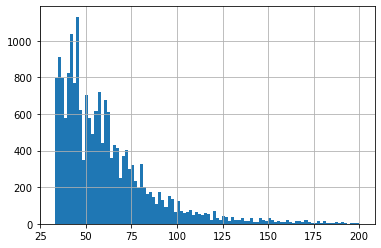

In [59]:
print('Распределение общей площади')
data['total_area'].hist(bins=100, range=(33,200))
plt.show()

Распределение цен


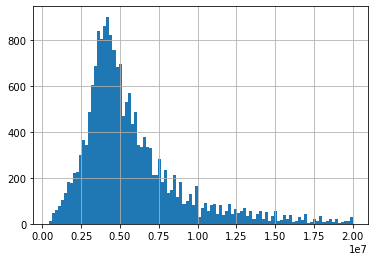

In [60]:
print('Распределение цен')
data['last_price'].hist(bins=100, range=(400000, 20000000))
plt.show()

Распределение числа комнат


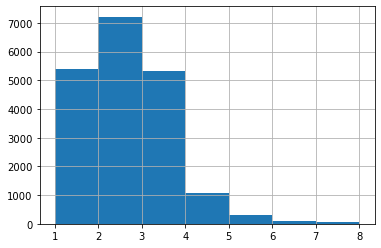

In [61]:
print('Распределение числа комнат')
data['rooms'].hist(bins=7, range=(1, 8))
plt.show()

Распределение высот потолков


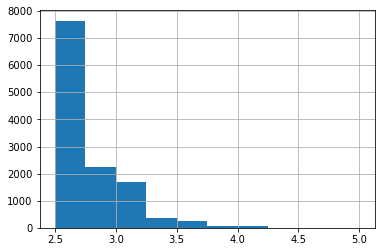

In [62]:
print('Распределение высот потолков')
data['ceiling_height'].hist(bins=10, range=(2.5, 5))
plt.show()

**"Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго? Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."**

Распределение времени размещения объявлений


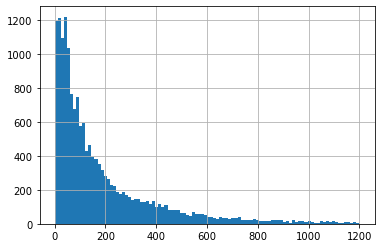

In [63]:
print('Распределение времени размещения объявлений')
data['days_exposition'].hist(bins=100, range=(1, 1200))
plt.show()

In [64]:
print("Среднее: {:.0f};".format(round(data['days_exposition'].mean())))
print("Медиана: {:.0f}.".format(round(data['days_exposition'].median())))


Среднее: 163;
Медиана: 81.


Можно сделать вывод, что обычно продажа длится около 3 месяцев. Вызовем "ящик с усами":

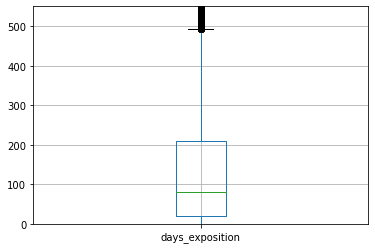

In [65]:
data.boxplot(column='days_exposition')
plt.ylim(0, 550)
plt.show()

Отбросим значения времени продажи, равные нулю, а также превышающие 365 дней. Объявления, "висящие" больше года — это странно. Много значений находятся в области около 0. Примем минимальный срок продажи квартиры за 10 дней:

In [66]:
data_days_exposition = data.query('days_exposition <= 365 and days_exposition >= 10')['days_exposition']

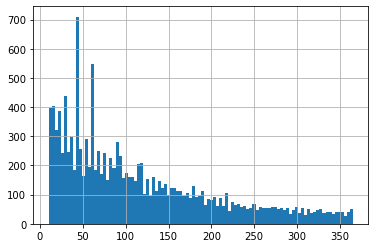

In [67]:
data_days_exposition.hist(bins=100)
plt.show()

In [68]:
print("Среднее: {:.0f};".format(round(data_days_exposition.mean())))
print("Медиана: {:.0f}.".format(round(data_days_exposition.median())))

Среднее: 116;
Медиана: 90.


**"Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года".**

Соберём только нужные нам параметры и посмотрим на коэффициенты корреляции Пирсона:

In [69]:
(data[['last_price',
       'total_area',
       'rooms',
       'city_center_distance',
       'floor_category',
       'publication_day_of_the_week',
       'publication_month',
       'publication_year']
     ]
     .corr()
)

,last_price,total_area,rooms,city_center_distance,publication_day_of_the_week,publication_month,publication_year
last_price,1.000000,0.639151,0.347321,-0.057939,0.000911,0.000789,-0.038503
total_area,0.639151,1.000000,0.752459,-0.086372,-0.004694,0.002837,-0.079837
rooms,0.347321,0.752459,1.000000,-0.065071,-0.000138,-0.006266,-0.048543
city_center_distance,-0.057939,-0.086372,-0.065071,1.000000,0.002343,-0.004016,-0.003473
publication_day_of_the_week,0.000911,-0.004694,-0.000138,0.002343,1.000000,0.012390,-0.008061
publication_month,0.000789,0.002837,-0.006266,-0.004016,0.012390,1.000000,-0.255308
publication_year,-0.038503,-0.079837,-0.048543,-0.003473,-0.008061,-0.255308,1.000000


Построим диаграмму рассеяния для каждого интересующего нас случая:

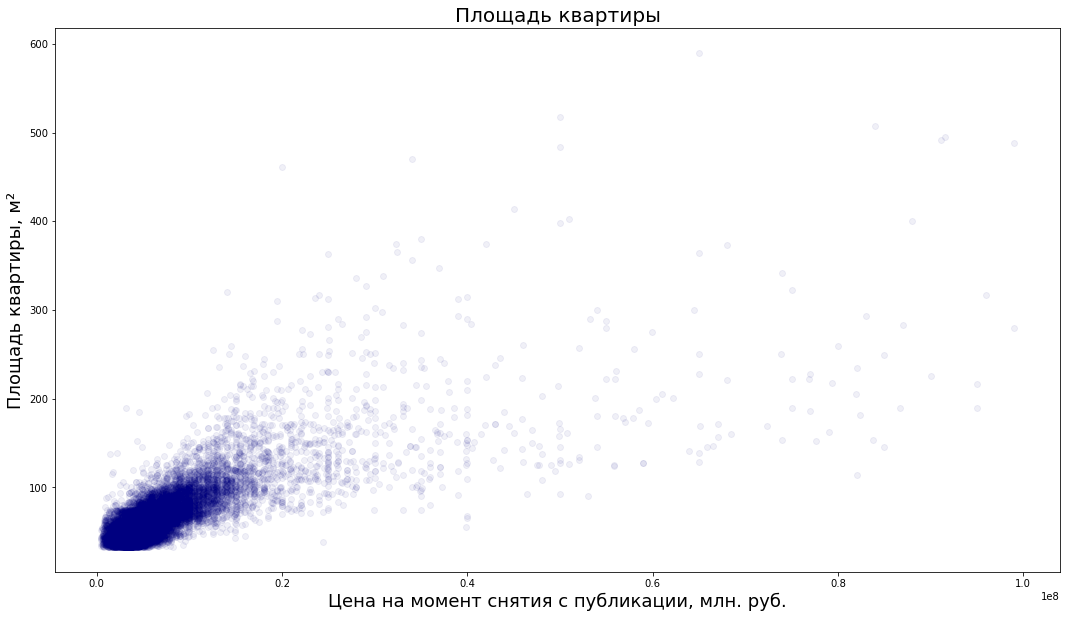

In [70]:
x = data[(data['last_price'] <= 100000000) & (data['total_area'] <= 600)]['last_price']
y = data[(data['last_price'] <= 100000000) & (data['total_area'] <= 600)]['total_area']

fig, (ax1) = plt.subplots(
    figsize=(18, 10)
)
 
ax1.scatter(x,
            y,
            marker='o',
            c='navy',
            alpha=0.06)
ax1.set_title('Площадь квартиры', fontsize=20)
ax1.set_xlabel('Цена на момент снятия с публикации, млн. руб.', fontsize=18)
ax1.set_ylabel('Площадь квартиры, м²', fontsize=18)
plt.show()

Зависимость стоимости квартиры от её площади налицо. Странно, если бы её не было :)

**Чем больше площадь квартиры, тем выше её стоимость.**

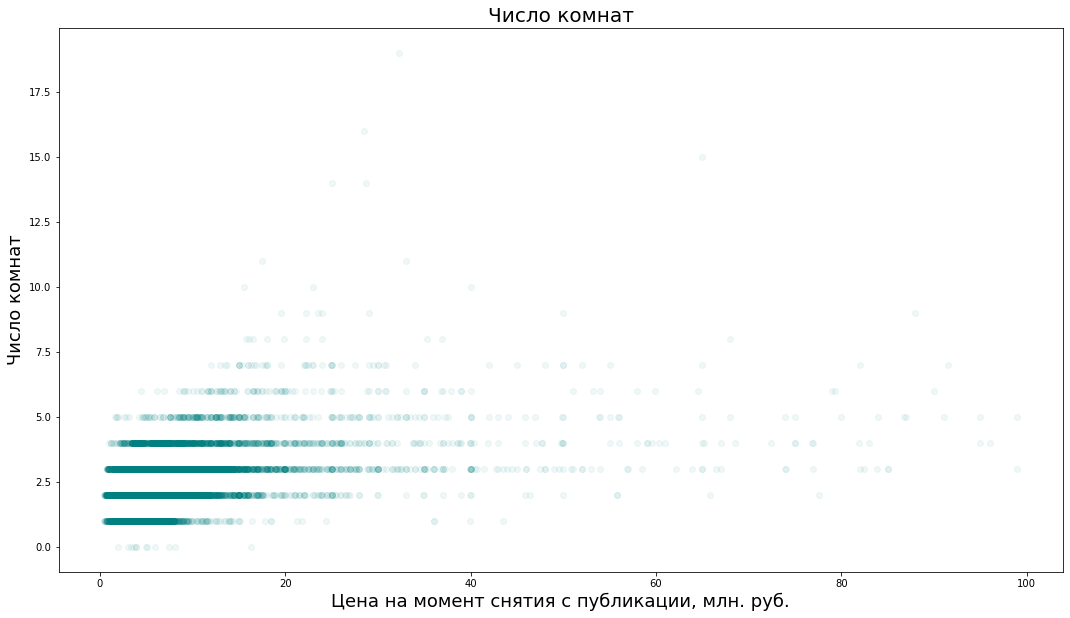

In [71]:


x = data[(data['last_price'] <= 100000000)]['last_price']
y = data[(data['last_price'] <= 100000000)]['rooms']

fig, (ax1) = plt.subplots(
    figsize=(18, 10)
)
 
ax1.scatter(x/1000000,
            y,
            marker='o',
            c='teal',
            edgecolor='teal',
            alpha=0.06)
ax1.set_title('Число комнат', fontsize=20)
ax1.set_xlabel('Цена на момент снятия с публикации, млн. руб.', fontsize=18)
ax1.set_ylabel('Число комнат', fontsize=18) 
plt.show()

С комнатами наблюдаем похожую ситуацию: **чем больше комнат, тем дороже обходится такая квартира потенциальному владельцу**.

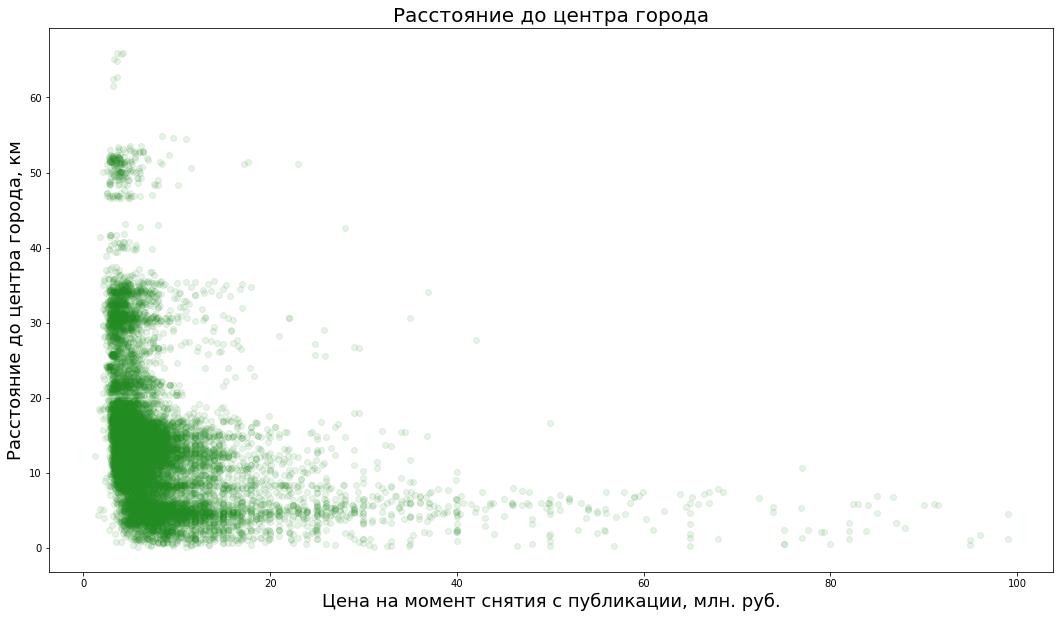

In [72]:
x = data[(data['last_price'] <= 100000000) & (data['city_center_distance'] != 0)]['last_price']
y = data[(data['last_price'] <= 100000000) & (data['city_center_distance'] != 0)]['city_center_distance']

fig, (ax1) = plt.subplots(
    figsize=(18, 10)
)
 
ax1.scatter(x/1000000,
            y/1000,
            marker='o',
            c='forestgreen',
            edgecolor='forestgreen',
            alpha=0.1)
ax1.set_title('Расстояние до центра города', fontsize=20)
ax1.set_xlabel('Цена на момент снятия с публикации, млн. руб.', fontsize=18)
ax1.set_ylabel('Расстояние до центра города, км', fontsize=18) 
plt.show()

Зависимость стоимости квартир от расстояния до центра города прослеживается лишь в высоком ценовом сегменте. Иными словами, **чем дешевле квартира, тем менее явно выражена зависимость её стоимости от расстояния до центра Санкт-Петербурга**.

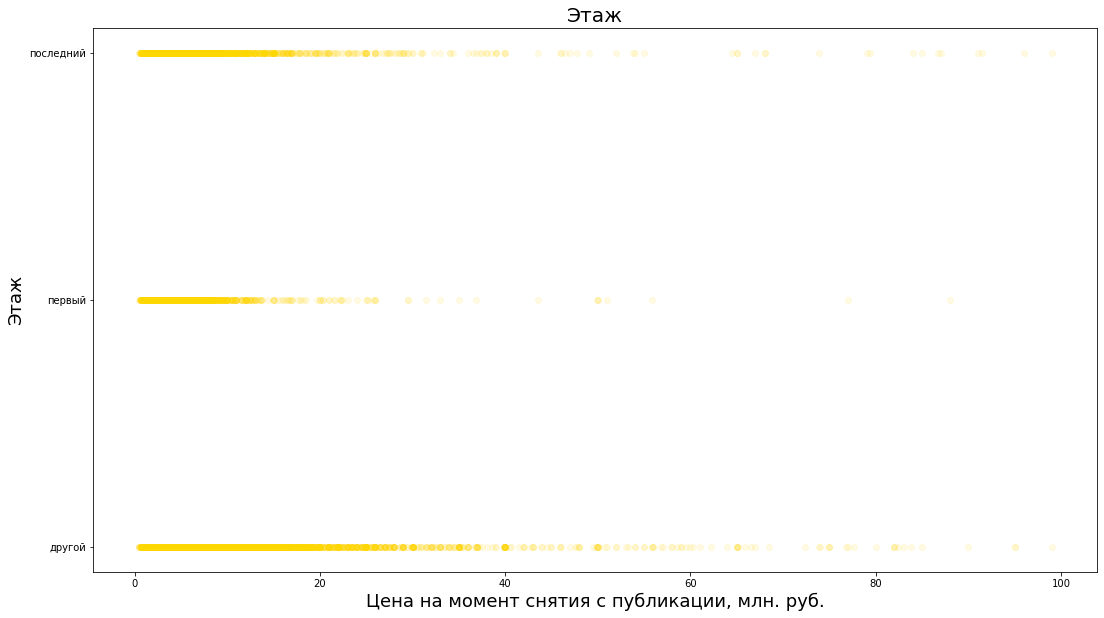

In [73]:
x = data[(data['last_price'] <= 100000000) & (data['floor_category'] != '<недостаточно данных>')]['last_price']
y = data[(data['last_price'] <= 100000000) & (data['floor_category'] != '<недостаточно данных>')]['floor_category']

fig, (ax1) = plt.subplots(
    figsize=(18, 10)
)
 
ax1.scatter(x/1000000,
            y,
            marker='o',
            c='gold',
            edgecolor='gold',
            alpha=0.1)
ax1.set_title('Этаж', fontsize=20)
ax1.set_xlabel('Цена на момент снятия с публикации, млн. руб.', fontsize=18)
ax1.set_ylabel('Этаж', fontsize=18) 
plt.show()

**Квартиры, расположенные на первом этаже, дешевле всего. Последний этаж тоже несколько уступает в цене остальным вариантам, но не так, как первый.**

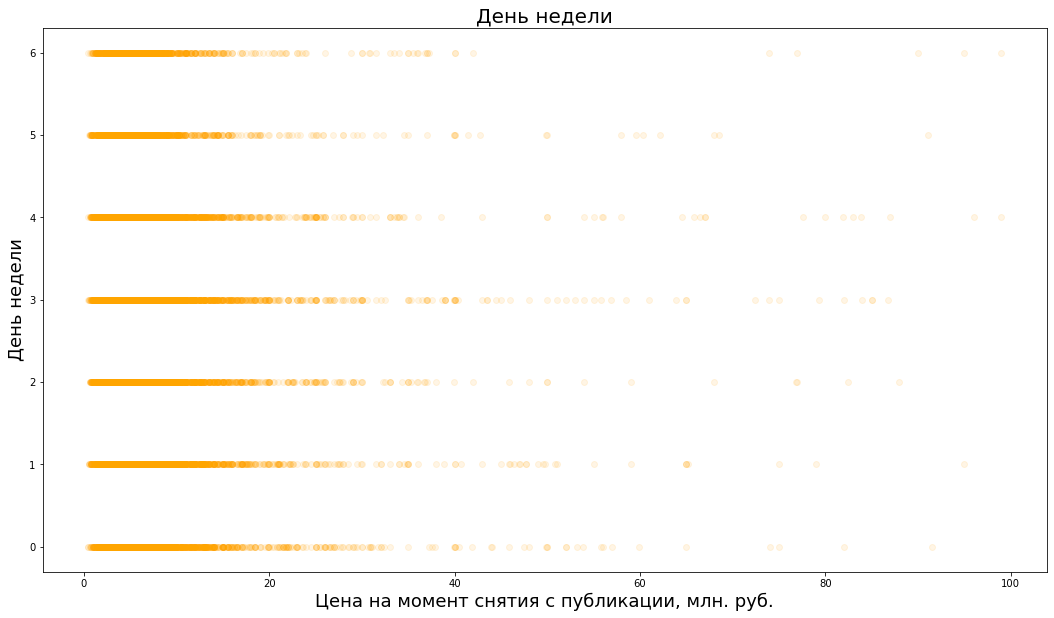

In [74]:
x = data[(data['last_price'] <= 100000000)]['last_price']
y = data[(data['last_price'] <= 100000000)]['publication_day_of_the_week']

fig, (ax1) = plt.subplots(
    figsize=(18, 10)
)
 
ax1.scatter(x/1000000,
            y,
            marker='o',
            c='orange',
            edgecolor='orange',
            alpha=0.1)
ax1.set_title('День недели', fontsize=20)
ax1.set_xlabel('Цена на момент снятия с публикации, млн. руб.', fontsize=18)
ax1.set_ylabel('День недели', fontsize=18) 
plt.show()

**От дня продажи квартиры её стоимость явно не зависит.**

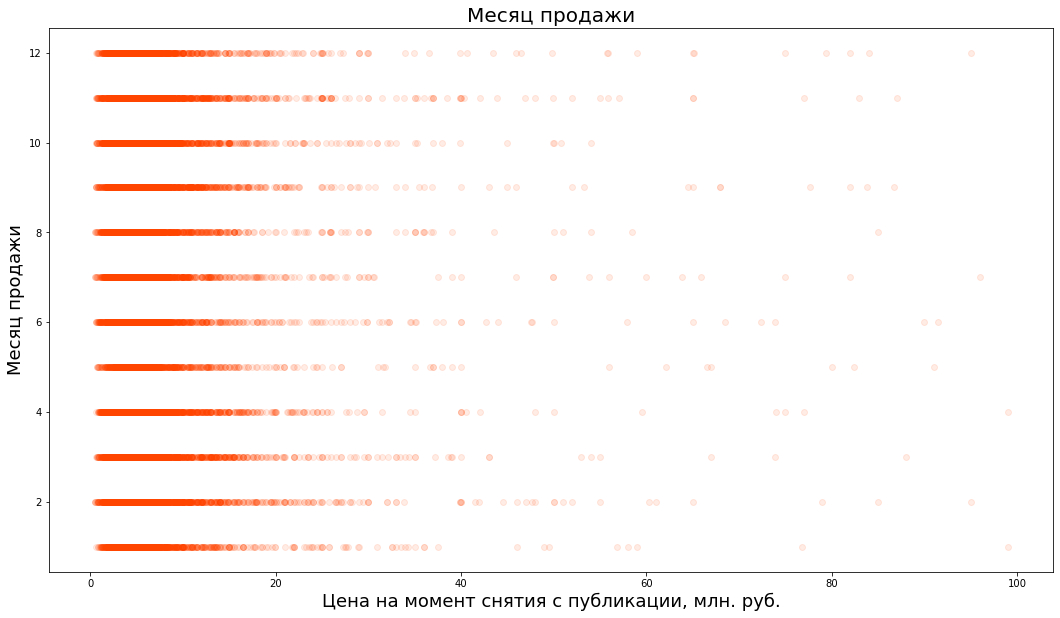

In [75]:
x = data[(data['last_price'] <= 100000000)]['last_price']
y = data[(data['last_price'] <= 100000000)]['publication_month']

fig, (ax1) = plt.subplots(
    figsize=(18, 10)
)
 
ax1.scatter(x/1000000,
            y,
            marker='o',
            c='orangered',
            edgecolor='orangered',
            alpha=0.1)
ax1.set_title('Месяц продажи', fontsize=20)
ax1.set_xlabel('Цена на момент снятия с публикации, млн. руб.', fontsize=18)
ax1.set_ylabel('Месяц продажи', fontsize=18) 
plt.show()

**Не наблюдается чёткой зависимости и в случае месяца продажи.**

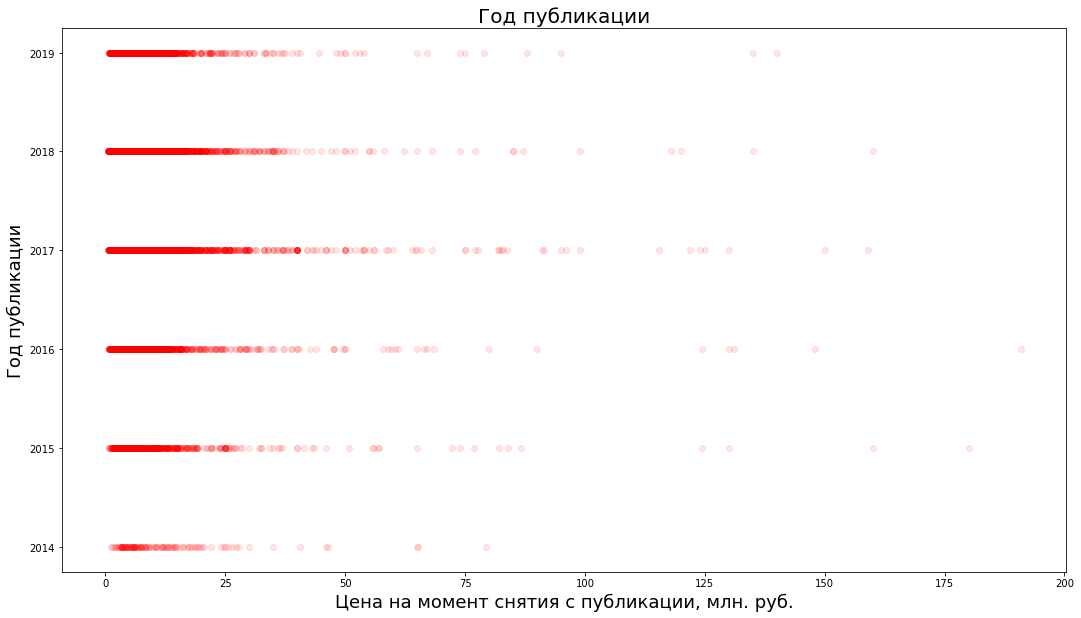

In [76]:
x = data[(data['last_price'] <= 200000000)]['last_price']
y = data[(data['last_price'] <= 200000000)]['publication_year']

fig, (ax1) = plt.subplots(
    figsize=(18, 10)
)
 
ax1.scatter(x/1000000,
            y,
            marker='o',
            c='red',
            edgecolor='red',
            alpha=0.1)
ax1.set_title('Год публикации', fontsize=20)
ax1.set_xlabel('Цена на момент снятия с публикации, млн. руб.', fontsize=18)
ax1.set_ylabel('Год публикации', fontsize=18) 
plt.show()

**Можно сказать, что стоимость квартир с 2014 года начала расти, достигнув пика 2017 году. Затем наблюдалось постепенное снижение цен.**

**"Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'".**

In [77]:
data['locality_name'].value_counts().head(10)

санкт-петербург      13271
поселок мурино         378
деревня кудрово        360
поселок шушары         359
всеволожск             347
пушкин                 298
колпино                294
поселок парголово      283
гатчина                250
выборг                 167
Name: locality_name, dtype: int64

Наибольшее количество объявлений наблюдается в **Санкт-Петербурге, посёлке Мурино, деревне Кудрово, посёлке Шушары, Всеволожске, Пушкине, Колпине, посёлке Парголово, Гатчине и Выборге**.

In [78]:
top_10 = ['санкт-петербург',
          'поселок мурино',
          'деревня кудрово',
          'поселок шушары',
          'всеволожск',
          'пушкин',
          'колпино',
          'поселок парголово',
          'гатчина',
          'выборг'
         ]
data_localities = (data[['locality_name',
                         'square_meter_cost',
                         'last_price',
                         'total_area',
                         'living_area',
                         'kitchen_area',
                         'living_to_total_area_ratio',
                         'kitchen_to_total_area_ratio']
                       ]
                   .query('locality_name in @top_10 ')
                   .groupby('locality_name')
                   .mean()
                   .sort_values('square_meter_cost', ascending=False)
                  )
data_localities

,square_meter_cost,last_price,total_area,living_area,kitchen_area,living_to_total_area_ratio,kitchen_to_total_area_ratio
locality_name,,,,,,,
санкт-петербург,114347.076483,8.361791e+06,67.477284,38.775747,11.147308,0.565146,0.178071
пушкин,103820.959732,7.018202e+06,66.478826,37.521141,11.400134,0.561919,0.177279
деревня кудрово,94688.702778,4.600588e+06,49.089528,24.285611,11.758528,0.483496,0.251069
поселок парголово,90458.855124,4.561426e+06,51.959823,25.449081,11.408551,0.469123,0.237246
поселок мурино,83605.711640,3.974612e+06,48.613915,24.598730,11.132169,0.490610,0.242307
поселок шушары,76905.994429,4.263405e+06,56.590279,30.622674,10.866267,0.527158,0.205362
колпино,74189.142857,4.099946e+06,55.657653,33.405884,8.652721,0.594779,0.163348
всеволожск,68938.417867,3.893985e+06,57.369049,31.475216,10.253919,0.537189,0.189930
гатчина,67660.916000,3.668637e+06,54.112320,31.523840,8.535560,0.581792,0.163395


**Среди популярных населённых пунктов самая высокая стоимость жилья в Санкт-Петербурге, самая низкая — в Выборге.**

**"Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона".**

In [79]:
data_distances = (data
                  .query('locality_name == "санкт-петербург" and city_center_distance != 0')
                  [['last_price',
                        'city_center_distance',
                        'nearest_airport_distance',
                        'square_meter_cost']
                      ]
                 )
data_distances['city_center_distance_km'] = (data_distances['city_center_distance']/1000).astype(int)

data_distances_grouped = (data_distances[['last_price',
                                          'city_center_distance_km']
                                        ]
                                        .groupby('city_center_distance_km')
                                        .mean().astype(int)
                         )
data_distances_grouped

,last_price
city_center_distance_km,
0,24099229
1,19431663
2,16835885
3,13460871
4,13148129
5,15148014
6,13771934
7,13515281
8,8919055


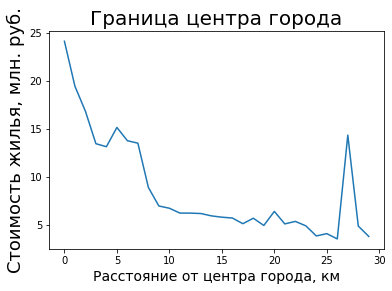

In [80]:
y = data_distances_grouped['last_price']/1000000
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
fig, ax = plt.subplots()

ax.plot(x, y, label=r"")
ax.set_ylabel(r'Стоимость жилья, млн. руб.', fontsize=18)
ax.set_xlabel(r'Расстояние от центра города, км', fontsize=14)
ax.set_title('Граница центра города', fontsize=20)

plt.show()

**Исходя из кривой, можно предположить, что центральная зона города имеет радиус порядка 10 км.**

**"Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?**"

In [81]:
data_center = (data
                   .query('city_center_distance <= 10000')
               [['total_area',
                 'last_price',
                 'rooms',
                 'city_center_distance',
                 'first_day_exposition',]
               ]
              )

data_center.head(10)

,total_area,last_price,rooms,city_center_distance,first_day_exposition
4,100.00,10000000,2,8098,2018-06-19
8,33.16,2900000,1,0,2018-05-23
12,54.00,3890000,2,0,2016-06-30
22,58.00,5000000,2,0,2017-04-24
24,97.20,6500000,2,2336,2015-10-31
35,149.00,15500000,5,3502,2017-06-26
38,40.00,3150000,1,0,2018-03-29
47,56.10,3600000,3,0,2018-10-18
51,161.00,45000000,3,6589,2017-10-17
52,136.00,11795000,6,6582,2017-09-22


Выведем коэффициенты корреляции для выборки, взятой в радиусе 10 км:

In [82]:
(data_center[['last_price',
              'total_area',
              'rooms',
              'city_center_distance']
             ]
             .corr()
)

,last_price,total_area,rooms,city_center_distance
last_price,1.000000,0.656839,0.366557,0.181184
total_area,0.656839,1.000000,0.774399,0.217963
rooms,0.366557,0.774399,1.000000,0.167651
city_center_distance,0.181184,0.217963,0.167651,1.000000


Сравним с коэффициентами, полученными ранее для общей выборки:

In [83]:
(data[['last_price',
       'total_area',
       'rooms',
       'city_center_distance']
     ]
     .corr()
)

,last_price,total_area,rooms,city_center_distance
last_price,1.000000,0.639151,0.347321,-0.057939
total_area,0.639151,1.000000,0.752459,-0.086372
rooms,0.347321,0.752459,1.000000,-0.065071
city_center_distance,-0.057939,-0.086372,-0.065071,1.000000


Из разностей коэффициентов корреляции Пирсона видно, что **в центральной зоне города вдвое сильнее проявляется зависимость стоимости квартир от количества комнат, а также менее заметна зависимость стоимости квартиры от расстояния до центра города, что звучит вполне логично в виду сужения рассматриваемой области**.

### 5. Общий вывод

В ходе работы был **изучен файл с данными**, были **найдены и обработаны пропущенные значения**. Часть пропусков могли быть обусловлены полями, не заполненными владельцами квартир. Другие пропуски могли появиться вследствие ошибок при формировании датасета. Была **произведена замена типа данных** для удобства дальнейшей работы. Найдены и устранены **аномалии**, мешавшие дальнейшей работе с данными. **Поиск дубликатов** показал, что дальнейшая обработка не требуется.

Вычислены для каждого объявления **цена квадратного метра**, **день недели**, **месяц и год публикации**, **этаж квартиры**, **соотношение жилой и общей площади**, а также **отношение площади кухни к общей**.

В ходе исследовательского анализа данных были изучены **зависимость стоимости квартир от их площади, числа комнат, высоты потолков, этажа, даты размещения объявления**.


На основании медианных значений было выдвинуто предположение о том, что продажа квартир в Санкт-Петербурге и Ленинградской области может обычно занимать в районе **3 месяцев**. При этом можно сказать, что квартиру продали быстро, если с момента размещения объявления прошло **не более 48 суток** Квартиру продавали долго, если к моменту продажи объявление существовало **более 280 дней**.


Очевидными оказались выводы о том, что **с увеличением площади квартиры растёт и её стоимость**, а также о том, что **квартиры, расположенные на первом или последнем этаже, дешевле всего**. Отсутствует зависимость стоимости квартиры от даты её продажи или дня недели, в которых произошла сделка.
Из менее очевидного: **чем дешевле квартира, тем менее явно выражена зависимость её стоимости от расстояния до центра Санкт-Петербурга**.

Обнаружены **закономерности в динамике цен: стоимость квартир с 2014 года начала расти, достигнув пика 2017 году. Затем наблюдалось постепенное снижение цен**.


Среди 10 населённых пунктов с наибольшим числом объявлений вычислены средняя цена квадратного метра. **Самая высокая стоимость жилья в Санкт-Петербурге, самая низкая — в Выборге**.

Из кривой зависимости стоимости квартир в Санкт-Петербурге от их удалённости от центра города было выдвинуто предположение о том, что **центральной можно считать зону с радиусом 10 км**.

По сравнению с общей выборкой, в центральной зоне увеличение количества комнат вдвое сильнее влияет на увеличение стоимости квартир. В виду сужения рассматриваемой области, зависимость стоимости квартир от расстояния до центра не так ярко выражена.